In [20]:
%matplotlib inline
import nsfg
import thinkstats2
import thinkplot
import numpy as np
import pandas as pd

In [52]:
preg = nsfg.ReadFemPreg()
preg = preg[preg.outcome == 1]




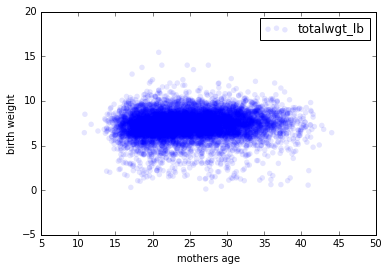

In [53]:
thinkplot.Scatter(preg.agepreg, preg.totalwgt_lb, alpha=.1)
thinkplot.Show(xlabel='mothers age', ylabel='birth weight')

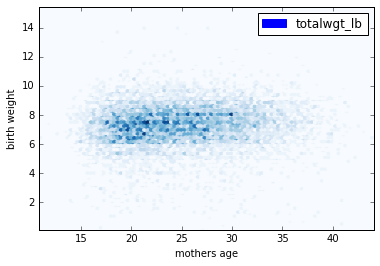

In [54]:
thinkplot.HexBin(preg.agepreg, preg.totalwgt_lb)
thinkplot.show(xlabel='mothers age', ylabel='birth weight')

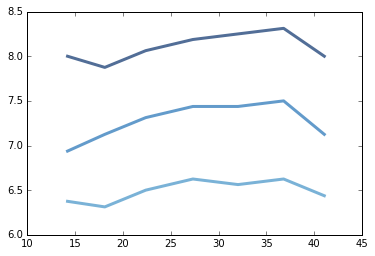

In [47]:
preg = preg.dropna(subset=['agepreg','totalwgt_lb'])
bins = np.arange(10,50,5)
indicies = np.digitize(preg.agepreg, bins)
groups = preg.groupby(indicies)
ages = [group.agepreg.mean()for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%d' % percent
    thinkplot.Plot(ages, weights, label=label)

In [48]:
pearsonsCorr = thinkstats2.Corr(preg.agepreg, preg.totalwgt_lb)
spearmansCorr = thinkstats2.SpearmanCorr(preg.agepreg, preg.totalwgt_lb)
pearsonsCorr, spearmansCorr

(0.068833970354109084, 0.094610041096582262)